In [7]:
import pandas as pd

from dynamo_pandas import put_df, get_df, keys
import boto3

df = get_df(table="DS3002_Project2")

df.sort_values(by=['ID'])[["ID","factor","pi","time"]].style.hide_index()

ID,factor,pi,time
1,12167,3.141675,2021-05-10 00:23:10
2,13824,3.141520,2021-05-10 00:24:10
3,15625,3.141657,2021-05-10 00:25:10
4,17576,3.141536,2021-05-10 00:26:10
5,19683,3.141643,2021-05-10 00:27:10
6,21952,3.141547,2021-05-10 00:28:10
7,24389,3.141634,2021-05-10 00:29:10
8,27000,3.141556,2021-05-10 00:30:10
9,29791,3.141626,2021-05-10 00:31:10
10,32768,3.141562,2021-05-10 00:32:10


<AxesSubplot:xlabel='ID', ylabel='factor'>

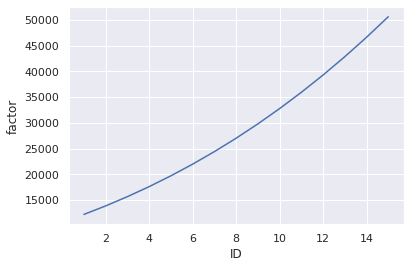

In [19]:
import seaborn as sns
sns.set_theme()

sns.lineplot(data=df, x="ID", y="pi")
